# Exercício 1: ADALINE
A rede neural ADALINE é uma rede de um neurônio, como o perceptron. Este relatório apresenta uma implementação do ADALINE em 
Python para o reconhecimento de imagens com A ou A invertido.

## Entradas
As entradas consistem em matrizes 5x5 preenchidas com -1 e 1, respectivamente. Cada entrada representa A ou A invertido (de cabeça para baixo). Os exemplos estão contidos na pasta A ou Ainv, para A ou A invertido.

Os exemplos são armazenados em arrays do numpy de dimensão (25,1) correspondentes à matriz "achatada" 

In [10]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Function for reading a file and creating a 5x5 array
def readFile(filename):
    with open(filename) as f:
        return np.array([int(num) for num in f.read().split()])
    
pathA = 'Exemplos/A/'
pathAinv = 'Exemplos/Ainv/'

# X_train contains all training instances
# Y_train contains all training labels
X_train = []
Y_train = []

for i in range(5):
    X_train.append(readFile(pathA + str(i+1) + '.txt'))
    Y_train.append(1)
    
for i in range(5):
    X_train.append(readFile(pathAinv + str(i+1) + '.txt'))
    Y_train.append(-1)
    
print(X_train[1])
print(Y_train[1])

[-1 -1  1 -1  1 -1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1
  1]
1


### Conjunto de treinamento:

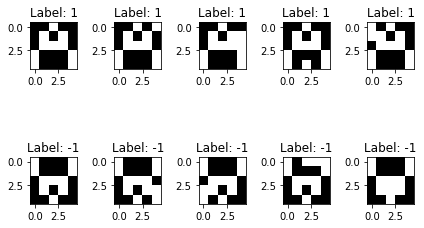

In [12]:
for i in range(10):
    
    # creating plots
    plt.subplot(2,5,i+1)
    plt.title('Label: ' + str(Y_train[i]))
    plt.imshow(X_train[i].reshape(5,5) ,cmap='gray')
    
plt.tight_layout()
plt.show()

### Implementação

In [61]:
class Adaline:

    # threshold is used on activation function
    def Adaline(self, threshold):
        self.weights = none
        self.threshold = threshold
        
    def signal(self, net, threshold = 0.5):
        return ( 1 if net > threshold else -1 )
        
    # X is the training dataset (an array with arrays), Y is the training dataset labels (an array with -1 or 1)
    # this function trains the ADALINE
    def train(self, X, Y, eta = 0.5, min_error=10e-3, max_iter=1000):
        # Using X first instance to determine weights length 
        size = X[0].shape[0]
        # initializing weights with length (size + 1) to accomodate theta
        self.weights = np.random.rand(size + 1)
        # initializing error
        square_error = min_error * 2
        
        # trains while max_iter is not exceeded and error is above minimum
        counter = 0
        while counter < max_iter and square_error >= min_error:
            
            # for each instance in X with label Y:
            for instance, label in zip(X,Y):
                
                # inserting theta in instance
                xi = np.append(instance, [1])
                
                # calculating net function
                net = np.sum(xi * self.weights)
                
                # calculating an estimated label
                est = self.signal(net)
                
                # calculating error
                error = label - est
                square_error = square_error + (error ** 2)
                
                # calculating gradient
                grad = -2 * error * xi
                
                # adjusting weights
                self.weights = self.weights - eta * grad
                
            
            # adjusting current error
            square_error /= len(X)
            counter += 1
                
                
    
    # predicts if target belongs to class 1 or -1
    def predict(self, sample):
        xi = np.append(sample, 1)
        net = np.sum(xi * self.weights)
        return self.signal(net)

## Testando

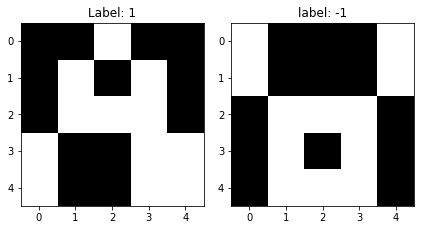

In [66]:
# loading test dataset
X_test = [readFile(pathA + '6.txt') , readFile(pathAinv + '6.txt')]
Y_test = [1,-1]

plt.subplot(121)
plt.title('Label: 1')
plt.imshow(X_test[0].reshape(5,5),cmap='gray')

plt.subplot(122)
plt.title('label: -1')
plt.imshow(X_test[1].reshape(5,5),cmap='gray')

plt.tight_layout()
plt.show()

## Teste e Treino

In [79]:
# Training
clf = Adaline()
clf.train(X_train, Y_train)

In [78]:
#Testing in training dataset

for instance, label in zip(X_train, Y_train):
    print("Target {0}, Predicted {1}".format(label, clf.predict(instance)))

Target 1, Predicted 1
Target 1, Predicted 1
Target 1, Predicted 1
Target 1, Predicted 1
Target 1, Predicted 1
Target -1, Predicted -1
Target -1, Predicted -1
Target -1, Predicted -1
Target -1, Predicted -1
Target -1, Predicted -1


In [80]:
#Testing in training dataset

for instance, label in zip(X_test, Y_test):
    print("Target {0}, Predicted {1}".format(label, clf.predict(instance)))

Target 1, Predicted 1
Target -1, Predicted -1


## Resultados

A rede neural conseguiu acertar todos os casos. Mais casos de teste com tamanhos maiores seriam interessantes para validar o resultado.